In [13]:
import numpy as np  #to support multi-dimensional arrays
import pandas as pd  #for data analysis
import matplotlib.pyplot as pp #to visualize data
import seaborn   #to make our matplotlib statistical graphics more aesthetic

In [14]:
fec = pd.read_csv('D:/M3/Projects/Latex/Data Analysis/Data Analysis v0.4/DataSets/P00000001-ALL.csv')



In [48]:
fec.info()
print(fec.iloc[123456])

unique_cands = fec.cand_nm.unique()

print(unique_cands)
print(unique_cands[2])

parties = {'Bachmann, Michelle': 'Republican',
'Cain, Herman': 'Republican',
'Gingrich, Newt': 'Republican',
'Huntsman, Jon': 'Republican',
'Johnson, Gary Earl': 'Republican',
'McCotter, Thaddeus G': 'Republican',
'Obama, Barack': 'Democrat',
'Paul, Ron': 'Republican',
'Pawlenty, Timothy': 'Republican',
'Perry, Rick': 'Republican',
"Roemer, Charles E. 'Buddy' III": 'Republican',
'Romney, Mitt': 'Republican',
'Santorum, Rick': 'Republican'}

print(fec.cand_nm[123456:123461])
print(fec.cand_nm[123456:123461].map(parties))

fec['party'] = fec.cand_nm.map(parties)

print(fec['party'].value_counts())
print((fec.contb_receipt_amt > 0).value_counts())

fec = fec[fec.contb_receipt_amt > 0]
fec_mrbo = fec[fec. cand_nm .isin ([ 'Obama, Barack', 'Romney, Mitt'])]

print(fec.contbr_occupation.value_counts()[:10])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 991475 entries, 0 to 1001730
Data columns (total 17 columns):
cmte_id              991475 non-null object
cand_id              991475 non-null object
cand_nm              991475 non-null object
contbr_nm            991475 non-null object
contbr_city          991457 non-null object
contbr_st            991471 non-null object
contbr_zip           991373 non-null object
contbr_employer      983833 non-null object
contbr_occupation    989133 non-null object
contb_receipt_amt    991475 non-null float64
contb_receipt_dt     991475 non-null object
receipt_desc         5219 non-null object
memo_cd              89461 non-null object
memo_text            94274 non-null object
form_tp              991475 non-null object
file_num             991475 non-null int64
party                991475 non-null object
dtypes: float64(1), int64(1), object(15)
memory usage: 136.2+ MB
cmte_id                                 C00431445
cand_id                      

In [49]:
fec_mrbo['party']

411       Republican
412       Republican
413       Republican
414       Republican
415       Republican
416       Republican
417       Republican
418       Republican
419       Republican
420       Republican
421       Republican
422       Republican
423       Republican
424       Republican
425       Republican
426       Republican
427       Republican
428       Republican
429       Republican
430       Republican
431       Republican
432       Republican
433       Republican
434       Republican
435       Republican
436       Republican
437       Republican
438       Republican
439       Republican
440       Republican
             ...    
701356      Democrat
701357      Democrat
701358      Democrat
701359      Democrat
701360      Democrat
701361      Democrat
701362      Democrat
701363      Democrat
701364      Democrat
701365      Democrat
701366      Democrat
701367      Democrat
701368      Democrat
701369      Democrat
701370      Democrat
701371      Democrat
701372      D

In [16]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

by_occupation = fec.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
print(over_2mm)
##print(by_occupation)


party                 Democrat    Republican
contbr_occupation                           
ATTORNEY           11141982.97  7.477194e+06
CEO                 2074974.79  4.211041e+06
CONSULTANT          2459912.71  2.544725e+06
ENGINEER             951525.55  1.818374e+06
EXECUTIVE           1355161.05  4.138850e+06
HOMEMAKER           4248875.80  1.363428e+07
INVESTOR             884133.00  2.431769e+06
LAWYER              3160478.87  3.912243e+05
MANAGER              762883.22  1.444532e+06
NOT PROVIDED        4866973.96  2.056547e+07
OWNER               1001567.36  2.408287e+06
PHYSICIAN           3735124.94  3.594320e+06
PRESIDENT           1878509.95  4.720924e+06
PROFESSOR           2165071.08  2.967027e+05
REAL ESTATE          528902.09  1.625902e+06
RETIRED            25305116.38  2.356124e+07
SELF-EMPLOYED        672393.40  1.640253e+06


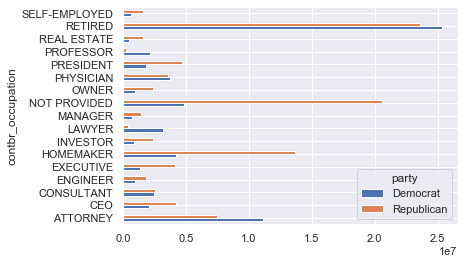

In [17]:
seaborn.set()
over_2mm.plot(kind='barh')

In [23]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    print(totals.nlargest(n))
    return totals.nlargest(n)

In [50]:
grouped = fec_mrbo.groupby('cand_nm')
#print(grouped)

In [51]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

contbr_occupation
RETIRED         25305116.38
ATTORNEY        11141982.97
NOT PROVIDED     4866973.96
HOMEMAKER        4248875.80
PHYSICIAN        3735124.94
LAWYER           3160478.87
CONSULTANT       2459912.71
Name: contb_receipt_amt, dtype: float64
contbr_occupation
RETIRED         25305116.38
ATTORNEY        11141982.97
NOT PROVIDED     4866973.96
HOMEMAKER        4248875.80
PHYSICIAN        3735124.94
LAWYER           3160478.87
CONSULTANT       2459912.71
Name: contb_receipt_amt, dtype: float64
contbr_occupation
RETIRED         11508473.59
NOT PROVIDED    11396894.84
HOMEMAKER        8147446.22
ATTORNEY         5364718.82
PRESIDENT        2491244.89
CEO              2324297.03
EXECUTIVE        2300947.03
Name: contb_receipt_amt, dtype: float64


cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             11141982.97
               NOT PROVIDED          4866973.96
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               LAWYER                3160478.87
               CONSULTANT            2459912.71
Romney, Mitt   RETIRED              11508473.59
               NOT PROVIDED         11396894.84
               HOMEMAKER             8147446.22
               ATTORNEY              5364718.82
               PRESIDENT             2491244.89
               CEO                   2324297.03
               EXECUTIVE             2300947.03
Name: contb_receipt_amt, dtype: float64

In [53]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

contbr_employer
RETIRED              22694358.85
SELF-EMPLOYED        18626807.16
NOT EMPLOYED          8586308.70
NOT PROVIDED          5053480.37
HOMEMAKER             2605408.54
STUDENT                318831.45
VOLUNTEER              257104.00
MICROSOFT              215585.36
SIDLEY AUSTIN LLP      168254.00
REFUSED                149516.07
Name: contb_receipt_amt, dtype: float64
contbr_employer
RETIRED              22694358.85
SELF-EMPLOYED        18626807.16
NOT EMPLOYED          8586308.70
NOT PROVIDED          5053480.37
HOMEMAKER             2605408.54
STUDENT                318831.45
VOLUNTEER              257104.00
MICROSOFT              215585.36
SIDLEY AUSTIN LLP      168254.00
REFUSED                149516.07
Name: contb_receipt_amt, dtype: float64
contbr_employer
NOT PROVIDED          12059527.24
RETIRED               11506225.71
HOMEMAKER              8147196.22
SELF-EMPLOYED          7414115.22
STUDENT                 496490.94
CREDIT SUISSE           281150.00
MORGAN S

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694358.85
               SELF-EMPLOYED         18626807.16
               NOT EMPLOYED           8586308.70
               NOT PROVIDED           5053480.37
               HOMEMAKER              2605408.54
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          12059527.24
               RETIRED               11506225.71
               HOMEMAKER              8147196.22
               SELF-EMPLOYED          7414115.22
               STUDENT                 496490.94
               CREDIT SUISSE           281150.00
               MORGAN STANLEY          267266.00
               GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

In [55]:
bins = np.array([0, 1, 10, 100, 1000, 10000,100000, 1000000, 10000000])

In [56]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [57]:
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [58]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [59]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [60]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [61]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

In [62]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


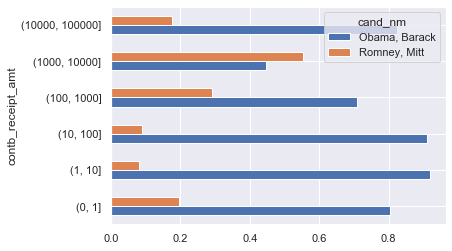

In [63]:
normed_sums[:-2].plot(kind='barh')

In [64]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [65]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [66]:
totals = totals[totals.sum(1) > 100000]

In [67]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [68]:
percent = totals.div(totals.sum(1), axis=0)

In [69]:
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
